# Aula 06 - RNA (Redes Neuraus Artificiais)

Tópicos da aula de Hoje:

* Perceptron
* MLP
* Keras API - Tensorflow
* Model Fully connected
* Exemplo Pima Diabetes

In [6]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
x_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
px.violin(df['Pregnancies'])

In [13]:
px.histogram(df, x='Insulin')

In [14]:
df.drop(df[df.Glucose < 20].index, inplace=True)
df.drop(df[df.BloodPressure < 15].index, inplace=True)
df.drop(df[df.BMI < 10].index, inplace=True)


In [15]:
media_SkinThickness = df['SkinThickness'].mean()
media_Insulin = df['Insulin'].mean()

In [16]:
df['SkinThickness'] = np.where(df['SkinThickness'] < 5, media_SkinThickness, df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'] < 10, media_Insulin, df['Insulin'])

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.00000,84.494475,33.6,0.627,50,1
1,1,85,66,29.00000,84.494475,26.6,0.351,31,0
2,8,183,64,21.44337,84.494475,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,27.130010,123.240560,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.645083,94.398997,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.443370,84.494475,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,84.494475,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
X = df.get(x_features).values

In [20]:
y = df.get('Outcome').values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Rede Neural - Modelo

In [23]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [24]:
model = tf.keras.models.Sequential()
model.add(Dense(80, input_dim=X.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2025-10-13 13:53:21.048223: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-10-13 13:53:21.048247: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-13 13:53:21.048259: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-13 13:53:21.048291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-13 13:53:21.048310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   # loss='mean_squared_error'

In [26]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, shuffle=True, callbacks=[es])

Epoch 1/40


2025-10-13 13:53:21.377656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 21ms/step - loss: 0.5611 - accuracy: 0.7253 - val_loss: 0.5584 - val_accuracy: 0.7339
Epoch 2/40
16/16 [==============================] - 0s 6ms/step - loss: 0.5021 - accuracy: 0.7589 - val_loss: 0.5355 - val_accuracy: 0.7339
Epoch 3/40
16/16 [==============================] - 0s 7ms/step - loss: 0.4801 - accuracy: 0.7668 - val_loss: 0.5205 - val_accuracy: 0.7523
Epoch 4/40
16/16 [==============================] - 0s 7ms/step - loss: 0.4702 - accuracy: 0.7846 - val_loss: 0.5104 - val_accuracy: 0.7477
Epoch 5/40
16/16 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7826 - val_loss: 0.5089 - val_accuracy: 0.7523
Epoch 6/40
16/16 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.7826 - val_loss: 0.4979 - val_accuracy: 0.7569
Epoch 7/40
16/16 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.7826 - val_loss: 0.5011 - val_accuracy: 0.7477
Epoch 8/40
16/16 [============

In [30]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.5060 - accuracy: 0.7385


[0.5060084462165833, 0.7385321259498596]

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2361 (9.22 KB)
Trainable params: 2361 (9.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


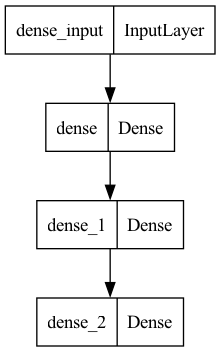

In [29]:
plot_model(model, to_file='model.png')